Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('customers.csv')

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# finding the number of rows and columns
customer_data.shape

(440, 8)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [7]:
X = customer_data.iloc[:,[3,4]].values

In [8]:
print(X)

[[ 9656  7561]
 [ 9810  9568]
 [ 8808  7684]
 [ 1196  4221]
 [ 5410  7198]
 [ 8259  5126]
 [ 3199  6975]
 [ 4956  9426]
 [ 3648  6192]
 [11093 18881]
 [ 5403 12974]
 [ 1124  4523]
 [12319 11757]
 [ 6208 14982]
 [ 9465 12091]
 [ 1114  3821]
 [ 8816 12121]
 [ 6157  2933]
 [ 6327 10099]
 [ 2495  9464]
 [ 4519  4602]
 [  871  2010]
 [ 1917  4469]
 [36423 22019]
 [ 9776 13792]
 [ 4230  7595]
 [  961  2861]
 [  803  3045]
 [20484 25957]
 [ 2100  2609]
 [ 3610 11107]
 [ 4339  3133]
 [ 1318  2886]
 [ 4786  7326]
 [ 1979  2262]
 [ 5491 11091]
 [ 4362  5428]
 [10556 12477]
 [15729 16709]
 [  555   902]
 [ 4332  4757]
 [ 3065  5956]
 [ 7555 14961]
 [11095 23998]
 [ 7027 10471]
 [22044 21531]
 [14069 21955]
 [54259 55571]
 [ 6152 10868]
 [21412 28921]
 [ 1095  1980]
 [ 4051  6996]
 [ 3916  5876]
 [10473 11532]
 [ 1449  1947]
 [ 3683  5005]
 [29892 26866]
 [ 9933 10487]
 [ 1970  1648]
 [ 5360  8040]
 [ 3045  7854]
 [38369 59598]
 [ 6245  6544]
 [11601 15775]
 [ 1227  3250]
 [20959 45828]
 [ 1534  7

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [11]:
# finding wcss value for different number of clusters
import warnings
warnings.filterwarnings("ignore")

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

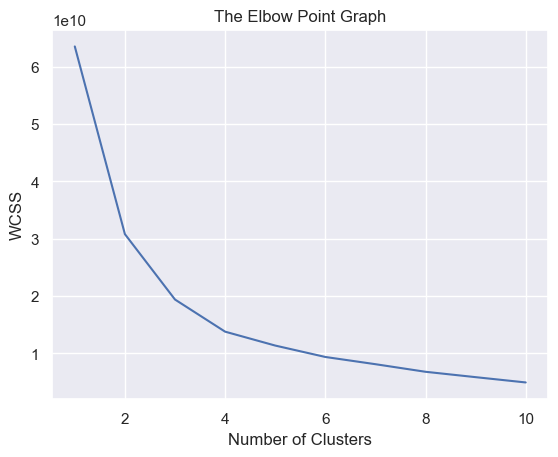

In [13]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 4 4 0 0 0 0 4 0 4 4 0 4 4 4 0 4 0 4 4 0 0 0 1 4 0 0 0 1 0 4 0 0 0 0 4 0
 4 1 0 0 0 4 1 4 1 1 3 4 1 0 0 0 4 0 0 1 4 0 4 0 2 0 4 0 1 0 4 0 0 0 4 0 4
 4 0 0 1 0 0 0 4 4 0 0 2 3 4 0 0 0 0 1 0 4 0 0 0 0 0 4 4 4 4 0 0 4 4 4 1 0
 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 4 4 0 0 0 4 4 0 0 1 0 0
 0 0 0 0 0 0 0 4 4 0 4 4 4 0 0 1 4 1 4 0 0 0 4 1 0 4 0 4 4 0 0 0 4 1 4 1 0
 0 0 4 4 4 0 0 0 4 0 0 0 4 0 0 1 1 4 0 0 1 0 0 0 4 0 1 0 4 4 4 1 0 4 0 0 4
 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 1 0 4 4 0 0 0 0
 0 0 0 0 0 4 1 1 0 4 0 0 0 4 0 0 0 0 0 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 0
 0 0 4 0 0 1 4 4 1 4 1 0 0 1 0 0 4 0 0 4 0 0 0 1 0 0 0 4 0 4 0 0 0 0 0 1 0
 2 0 4 0 0 0 0 4 4 0 1 0 0 4 4 0 1 0 1 0 4 0 0 0 4 4 0 0 0 0 0 0 4 0 0 0 0
 0 0 0 4 0 0 4 0 0 4 0 0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 4 0 0 0
 4 0 0 0 0 4 0 0 4 4 4 4 0 4 4 0 0 4 0 4 4 0 0 4 0 0 0 0 4 0 1 0 0]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

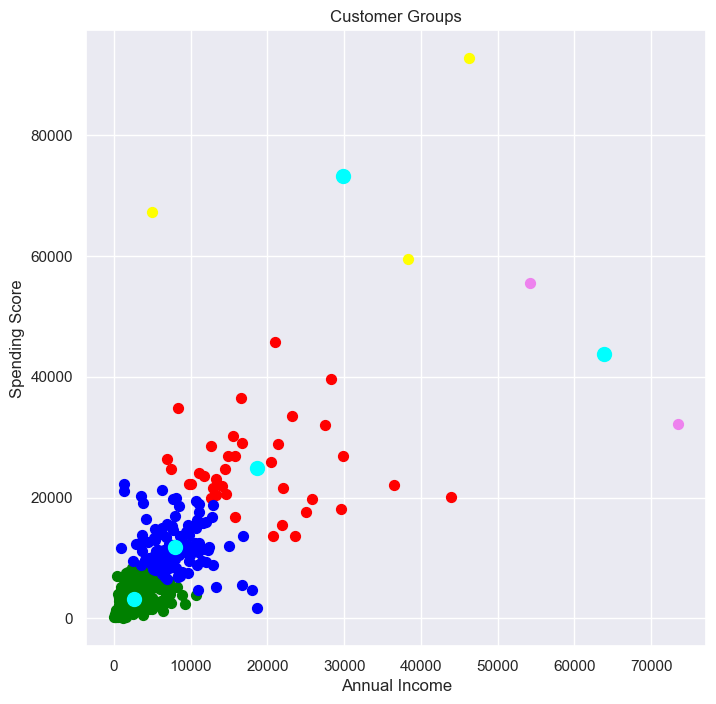

In [15]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()